In [ ]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for linear regression:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# for log transform
import numpy as np

In [ ]:
# put data source into data frame

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/DA Study/Linear Regression - wages.csv')

Mounted at /content/drive


In [ ]:
# check size and column count in the dataset

df.shape

(526, 14)

```python
# info about columns in dataset
• wage: average hourly earnings
• educ: years of education
• exper: years of potential experience
• tenure: years with the current employer
• nonwhite: =1 if nonwhite
• female: =1 if female
• numdep: number of dependents
• smsa: =1 if live in Standard Metropolitan Statistical Area (SMSA)
• west: =1 if live in the western region
• ndurman: =1 if in nondurable manufacturing industry
• trade: =1 if in wholesale or retail industry
• services: =1 if in services industry
• profocc: =1 if in a professional occupation
• servocc: =1 if in a service occupation
```

In [ ]:
# check data types and non null values count per column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   numdep    526 non-null    int64  
 7   smsa      526 non-null    int64  
 8   west      526 non-null    int64  
 9   ndurman   526 non-null    int64  
 10  trade     526 non-null    int64  
 11  services  526 non-null    int64  
 12  profocc   526 non-null    int64  
 13  servocc   526 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 57.7 KB


In [ ]:
# check number of unique values in a columns to undertand how to visualise each column

df.nunique()

,0
wage,219
educ,18
exper,51
tenure,34
nonwhite,2
female,2
numdep,7
smsa,2
west,2
ndurman,2


In [ ]:
df.describe()

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,29.487072,12.562738,17.01711,5.104563,0.102662,0.479087,1.043726,0.722433,0.169202,0.114068,0.287072,0.100760,0.366920,0.140684
std,18.463436,2.769022,13.57216,7.224462,0.303805,0.500038,1.261891,0.448225,0.375287,0.318197,0.452826,0.301298,0.482423,0.348027
min,2.600000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.600000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.300000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,34.400000,14.000000,26.00000,7.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,124.900000,18.000000,51.00000,44.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


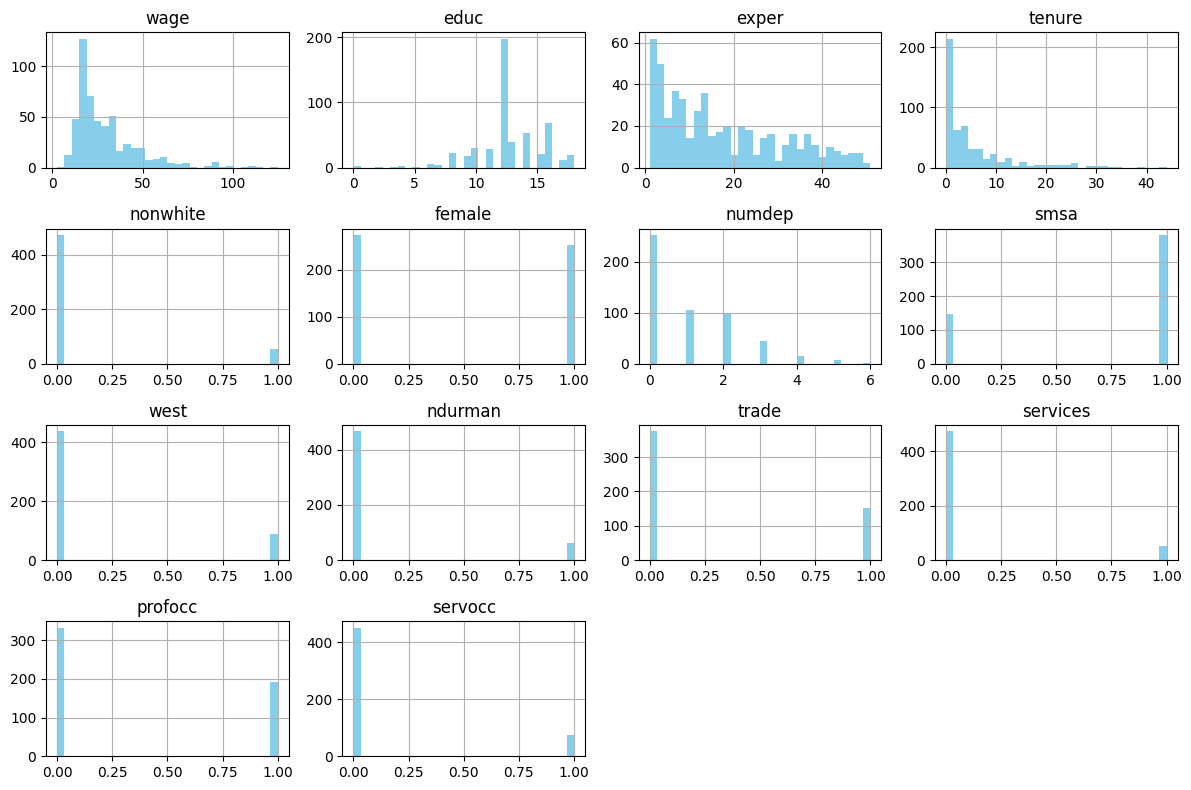

In [ ]:
# plot histograms for all variables to understand distribution

df.hist(figsize=(12, 8), bins=30, color='skyblue')
plt.tight_layout()
plt.show()

In [ ]:
# check tenure > experience

invalid_exper_tenure = df[df['exper'] < df['tenure']]

invalid_exper_tenure

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc
31,22.5,14,2,5,0,1,2,1,1,0,1,0,0,0
73,14.6,12,20,34,0,1,2,1,0,0,0,1,0,0
165,10.0,13,2,6,0,1,0,1,0,0,0,1,0,1
173,10.9,13,1,4,0,1,1,1,0,1,0,0,0,1
201,43.8,16,1,2,1,0,0,1,0,0,0,0,1,0
210,13.8,13,1,2,0,1,1,1,0,0,0,0,0,1
215,17.5,13,1,2,0,0,3,1,0,0,1,0,0,0
217,18.8,18,1,2,0,0,1,1,0,0,0,0,1,0
275,14.6,14,1,3,0,0,0,1,0,0,0,0,0,0
333,59.9,18,8,10,0,0,2,1,0,0,0,0,1,0


In [ ]:
# check industries overlap

df_1 = df.copy()

industry_cols = ['ndurman', 'trade', 'services']

df_1['industry_sum'] = df_1[industry_cols].sum(axis=1)

check_multiple_industries = df_1[df_1['industry_sum'] > 1]

check_multiple_industries

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc,industry_sum


In [ ]:
# check occupation overlap

occupation_cols = ['profocc', 'servocc']

df_1['occupation_sum'] = df_1[occupation_cols].sum(axis=1)

check_multiple_occupations = df_1[df_1['occupation_sum'] > 1]

check_multiple_occupations

,wage,educ,exper,tenure,nonwhite,female,numdep,smsa,west,ndurman,trade,services,profocc,servocc,industry_sum,occupation_sum


In [ ]:
# clear up those tenure > exper rows

df = df[df['exper'] >= df['tenure']]

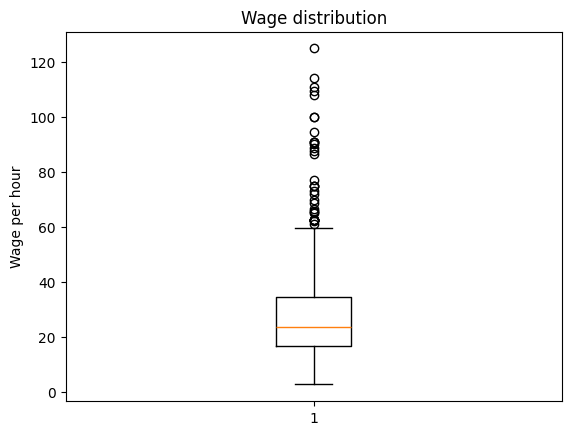

In [ ]:
plt.boxplot(df['wage'])
plt.title('Wage distribution')
plt.ylabel('Wage per hour')
plt.show()

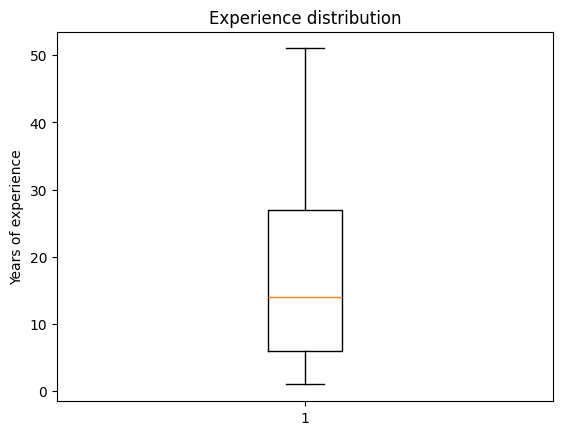

In [ ]:
plt.boxplot(df['exper'])
plt.title('Experience distribution')
plt.ylabel('Years of experience')
plt.show()

**educ** - there are 18 unique values in this column representing years of educaion. it is descrete variable.

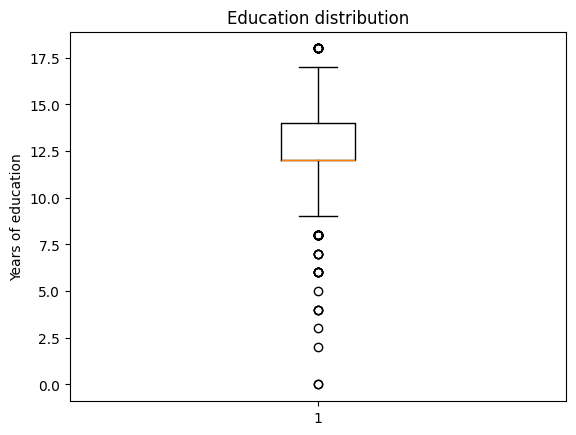

In [ ]:
plt.boxplot(df['educ'])
plt.title('Education distribution')
plt.ylabel('Years of education')
plt.show()

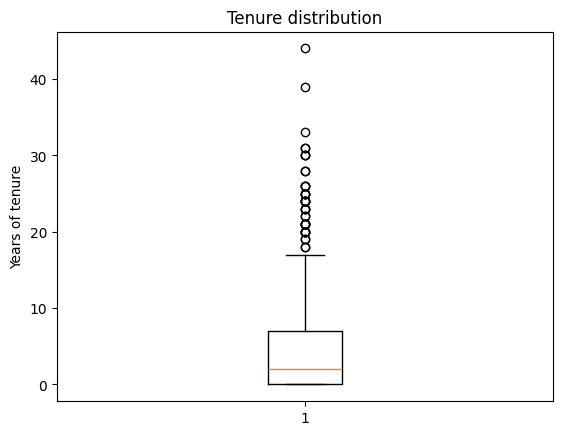

In [ ]:
plt.boxplot(df['tenure'])
plt.title('Tenure distribution')
plt.ylabel('Years of tenure')
plt.show()

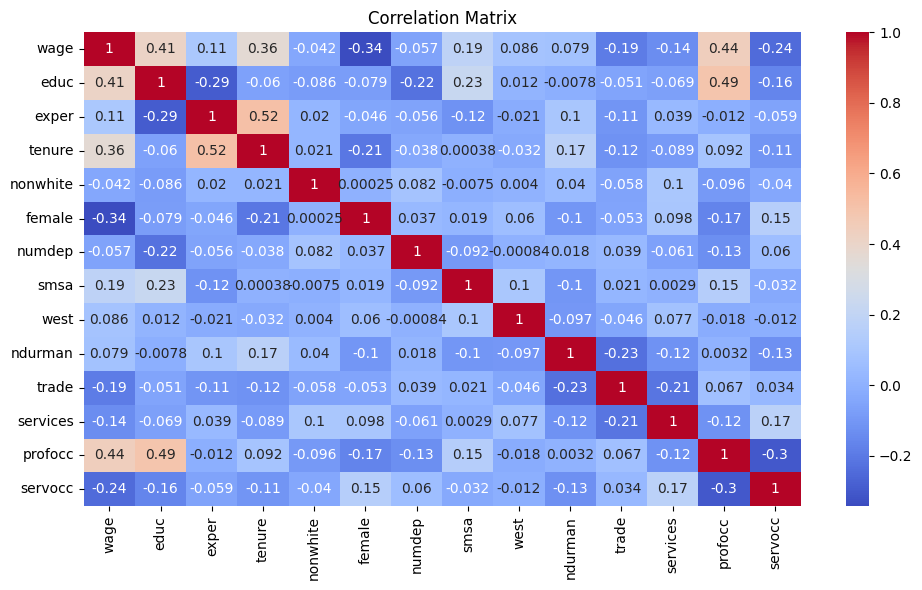

In [ ]:
# correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.tight_layout()

plt.show()

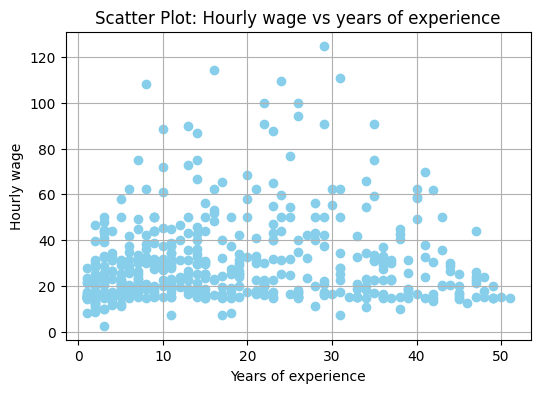

In [ ]:
# experience vs wage

plt.figure(figsize=(6, 4))

plt.scatter(df['exper'], df['wage'], color='skyblue')

plt.xlabel('Years of experience')
plt.ylabel('Hourly wage')
plt.title('Scatter Plot: Hourly wage vs years of experience')


plt.grid(True)

plt.show()

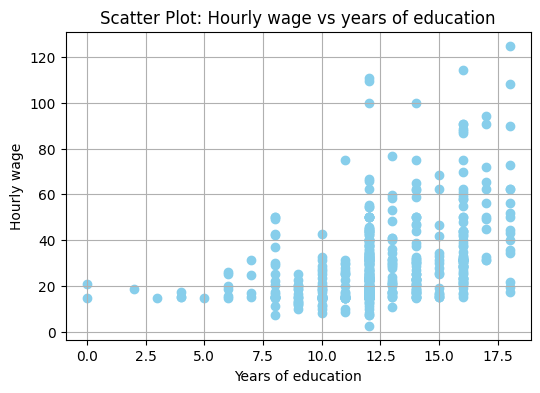

In [ ]:
# education vs wage

plt.figure(figsize=(6, 4))

plt.scatter(df['educ'], df['wage'], color='skyblue')

plt.xlabel('Years of education')
plt.ylabel('Hourly wage')
plt.title('Scatter Plot: Hourly wage vs years of education')
#plt.xticks(ticks=range(0, 19))

plt.grid(True)

plt.show()

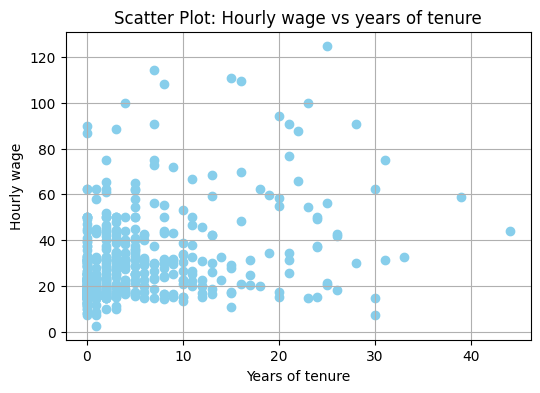

In [ ]:
# tenure vs wage

plt.figure(figsize=(6, 4))

plt.scatter(df['tenure'], df['wage'], color='skyblue')

plt.xlabel('Years of tenure')
plt.ylabel('Hourly wage')
plt.title('Scatter Plot: Hourly wage vs years of tenure')


plt.grid(True)

plt.show()

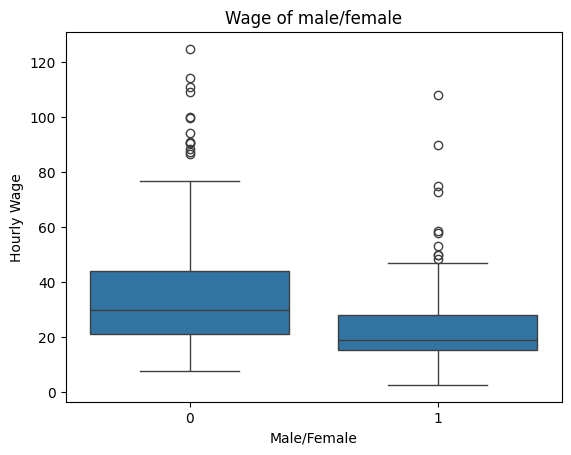

In [ ]:
# wage of male vs female

sns.boxplot(x='female', y='wage', data=df)
plt.xlabel('Male/Female')
plt.ylabel('Hourly Wage')
plt.title('Wage of male/female')

plt.show()

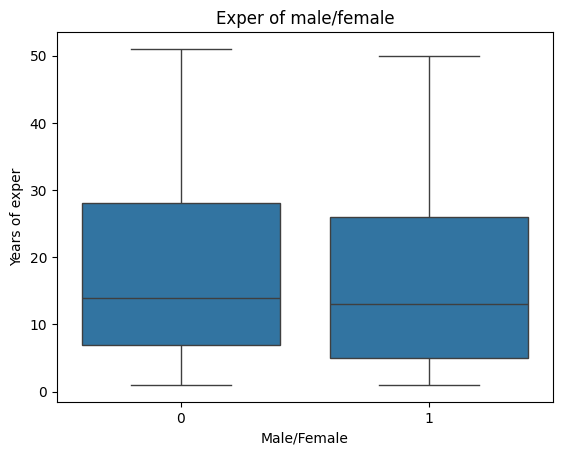

In [ ]:
# experience of male vs female

sns.boxplot(x='female', y='exper', data=df)
plt.xlabel('Male/Female')
plt.ylabel('Years of exper')
plt.title('Exper of male/female')

plt.show()

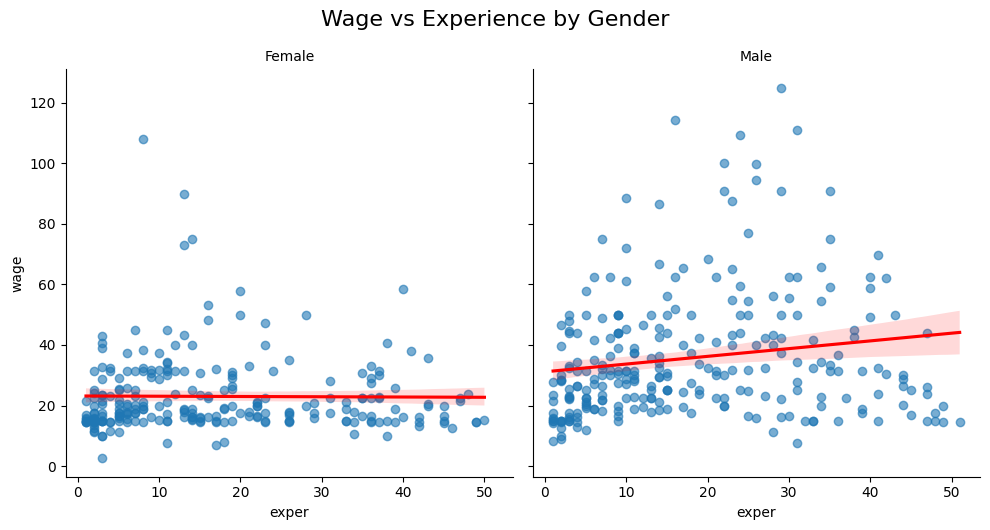

In [ ]:
df['gender'] = df['female'].map({0: 'Male', 1: 'Female'})

# scatterplots with linear regression line, separated by gender
g = sns.lmplot(
    data=df,
    x='exper',
    y='wage',
    col='gender',  # creates one plot for each gender
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

g.set_titles('{col_name}')
g.fig.suptitle('Wage vs Experience by Gender', fontsize=16, y=1.05)
plt.show()


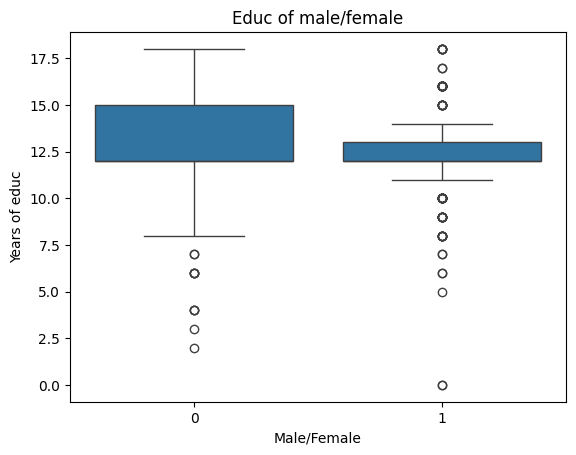

In [ ]:
# education of male vs female

sns.boxplot(x='female', y='educ', data=df)
plt.xlabel('Male/Female')
plt.ylabel('Years of educ')
plt.title('Educ of male/female')

plt.show()

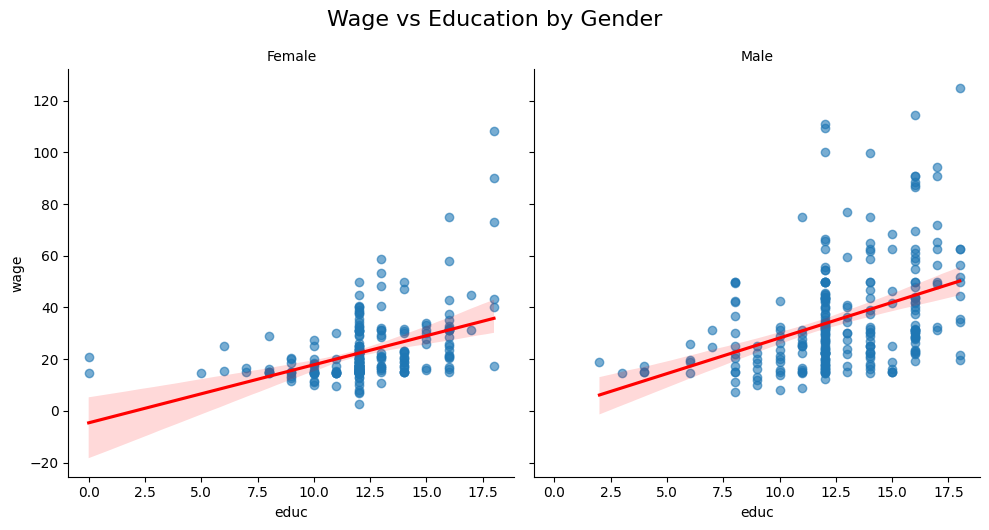

In [ ]:
# scatterplots with linear regression line, separated by gender
g = sns.lmplot(
    data=df,
    x='educ',
    y='wage',
    col='gender',
    height=5,
    aspect=1,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)

g.set_titles('{col_name}')  # Simplify titles
g.fig.suptitle('Wage vs Education by Gender', fontsize=16, y=1.05)

plt.show()

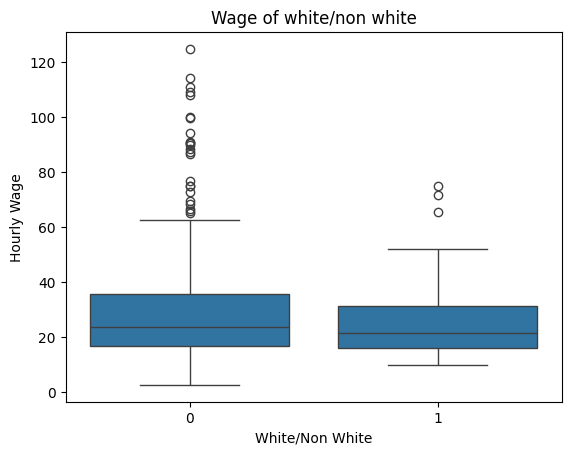

In [ ]:
# experience of white vs non white

sns.boxplot(x='nonwhite', y='wage', data=df)
plt.xlabel('White/Non White')
plt.ylabel('Hourly Wage')
plt.title('Wage of white/non white')

plt.show()

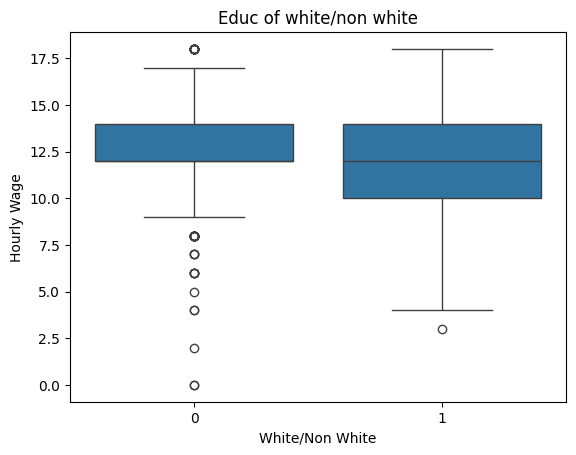

In [ ]:
# education of white vs non white

sns.boxplot(x='nonwhite', y='educ', data=df)
plt.xlabel('White/Non White')
plt.ylabel('Hourly Wage')
plt.title('Educ of white/non white')

plt.show()

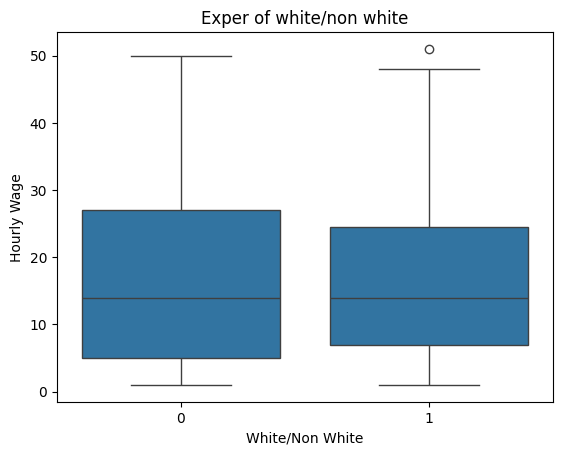

In [ ]:
# experience of white vs non white

sns.boxplot(x='nonwhite', y='exper', data=df)
plt.xlabel('White/Non White')
plt.ylabel('Hourly Wage')
plt.title('Exper of white/non white')

plt.show()

In [ ]:
# create column "Location"

def assign_location(row):
    if row['smsa'] == 1 and row['west'] == 1:
        return 'West MA'
    elif row['smsa'] == 1 and row['west'] == 0:
        return 'Non West MA'
    elif row['smsa'] == 0 and row['west'] == 1:
        return 'West non MA'
    else:
        return 'Non West non MA'

df['location'] = df.apply(assign_location, axis=1)

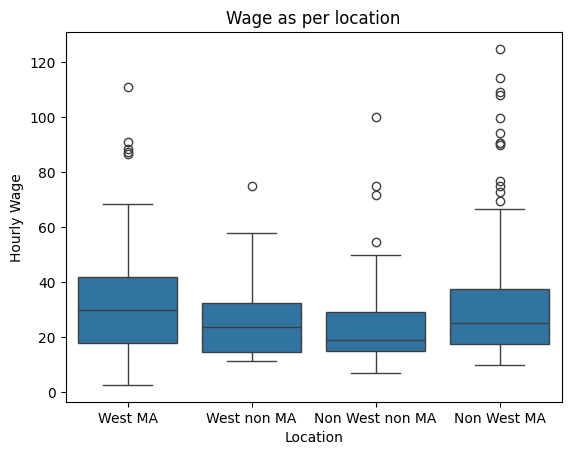

In [ ]:
# wage as per location

sns.boxplot(x='location', y='wage', data=df)
plt.xlabel('Location')
plt.ylabel('Hourly Wage')
plt.title('Wage as per location')

plt.show()

In [ ]:
# create column "Industry"

def assign_industry(row):
    if row['trade'] == 1:
        return 'Trade'
    elif row['ndurman'] == 1:
        return 'Non-dur Manuf'
    elif row['services'] == 1:
        return 'Services'
    else:
        return 'Other'

df['industry'] = df.apply(assign_industry, axis=1)

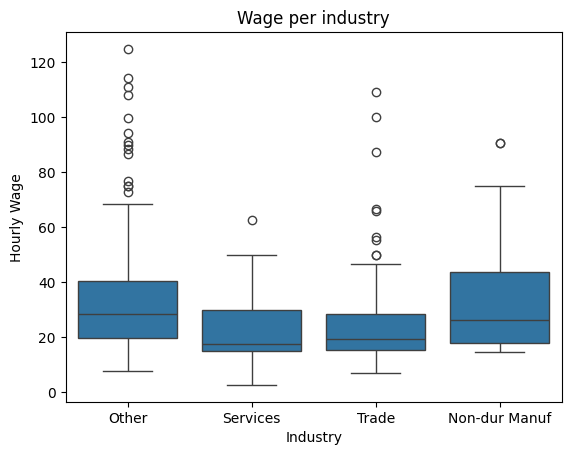

In [ ]:
# wage per industry

sns.boxplot(x='industry', y='wage', data=df)
plt.xlabel('Industry')
plt.ylabel('Hourly Wage')
plt.title('Wage per industry')
plt.show()

In [ ]:
# create column "Occupation"

def assign_occupation(row):
    if row['profocc'] == 1:
        return 'Profocc'
    elif row['servocc'] == 1:
        return 'Servocc'
    else:
        return 'Other'

df['occupation'] = df.apply(assign_occupation, axis=1)

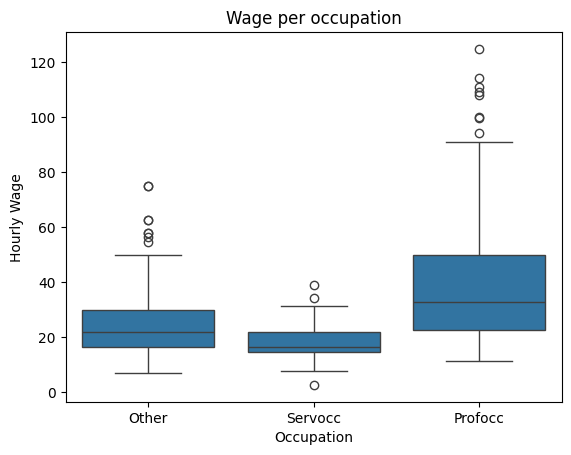

In [ ]:
# wage per occupation

sns.boxplot(x='occupation', y='wage', data=df)
plt.xlabel('Occupation')
plt.ylabel('Hourly Wage')
plt.title('Wage per occupation')
plt.show()

In [ ]:
# calculate wage top and bottom 5 percentiles
q_low = df['wage'].quantile(0.05)
q_high = df['wage'].quantile(0.95)

# create wage group labels
def wage_group(wage):
    if wage <= q_low:
        return 'bottom_5% earners'
    elif wage >= q_high:
        return 'top_5% earners'
    else:
        return 'middle_90% earners'

df['wage_group'] = df['wage'].apply(wage_group)

# group
grouped = df.groupby('wage_group')

# mean of num variables
numeric_cols = ['educ', 'exper', 'tenure', 'wage']
numeric_summary = grouped[numeric_cols].mean()

print("Mean of numeric variables by wage group:")
print(numeric_summary.round(2))

Mean of numeric variables by wage group:
                     educ  exper  tenure   wage
wage_group                                     
bottom_5% earners   10.58  13.58    2.88  10.58
middle_90% earners  12.48  17.40    4.69  27.42
top_5% earners      15.19  21.46   13.08  87.30


In [ ]:
# proportion of binary variables
binary_cols = ['smsa', 'west', 'ndurman', 'trade', 'services', 'profocc', 'servocc']
binary_summary = grouped[binary_cols].mean()  #mean = proportion

print("Proportion of binary variables by wage group:")
print((binary_summary * 100).round(1).astype(str) + '%')

Proportion of binary variables by wage group:
                     smsa   west ndurman  trade services profocc servocc
wage_group                                                              
bottom_5% earners   53.8%  23.1%    0.0%  57.7%    26.9%   15.4%   42.3%
middle_90% earners  72.5%  15.9%   11.8%  27.9%     9.6%   34.9%   12.9%
top_5% earners      84.6%  26.9%   19.2%  19.2%     0.0%   92.3%    0.0%


In [ ]:
# calculate education percentiles
q_low_educ = df['educ'].quantile(0.05)
q_high_educ = df['educ'].quantile(0.95)

# create edu group labels
def educ_group(educ):
    if educ <= q_low_educ:
        return 'bottom_5% educated'
    elif educ >= q_high_educ:
        return 'top_5% education'
    else:
        return 'middle_90%'

df['educ_group'] = df['educ'].apply(educ_group)

# mean numeric variables by education group
numeric_cols = ['educ', 'exper', 'tenure', 'wage']
print(df.groupby('educ_group')[numeric_cols].mean().round(0))

# Proportions of binary variables
binary_cols = ['female','smsa', 'west', 'ndurman', 'trade', 'services', 'profocc', 'servocc']
print((df.groupby('educ_group')[binary_cols].mean()*100).round(2).astype(str) + '%')

                    educ  exper  tenure  wage
educ_group                                   
bottom_5% educated   7.0   33.0     9.0  22.0
middle_90%          13.0   16.0     5.0  29.0
top_5% education    18.0   12.0     6.0  56.0
                    female    smsa    west ndurman   trade services profocc  \
educ_group                                                                    
bottom_5% educated   35.0%   50.0%   15.0%   25.0%   22.5%     7.5%    5.0%   
middle_90%          50.57%  73.24%  17.46%  10.43%  30.61%    10.2%  36.05%   
top_5% education    27.59%  86.21%  10.34%  10.34%  13.79%   10.34%   93.1%   

                   servocc  
educ_group                  
bottom_5% educated   17.5%  
middle_90%          14.29%  
top_5% education      0.0%  


In [ ]:
# model 1 - all variables

model1 = smf.ols('wage ~ educ + exper + tenure + nonwhite + female + numdep + smsa + west + ndurman + trade + services + profocc + servocc', data=df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     33.93
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.67e-60
Time:                        12:39:27   Log-Likelihood:                -2049.7
No. Observations:                 510   AIC:                             4127.
Df Residuals:                     496   BIC:                             4187.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8893      4.069      0.464      0.6

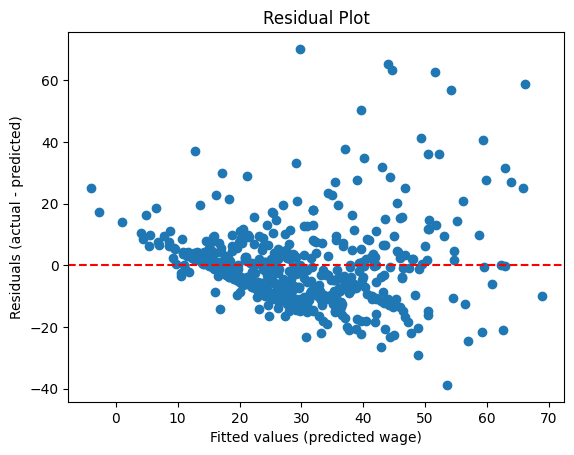

In [ ]:
#residuals plot for model 1 - shape of res plot - var of error increase

residuals = model1.resid
fitted_vals = model1.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot')

plt.show()

In [ ]:
# model 2 (exclude exper, nonwhite, numdep, ndurman, servocc as per results in model 1)

model2 = smf.ols('wage ~ educ  + tenure +  female +  smsa + west +  trade + services + profocc ', data=df).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     53.88
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           7.95e-63
Time:                        12:39:27   Log-Likelihood:                -2053.7
No. Observations:                 510   AIC:                             4125.
Df Residuals:                     501   BIC:                             4164.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2937      3.341      1.585      0.1

In [ ]:
# model 2 plus exp**2 since exp vs wage correlation does not look linear

model2_1 = smf.ols('wage ~ educ + exper + I(exper**2)+ tenure +  female +  smsa + west +  trade + services + profocc ', data=df).fit()

print(model2_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     48.64
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.87e-67
Time:                        12:39:27   Log-Likelihood:                -2038.5
No. Observations:                 510   AIC:                             4099.
Df Residuals:                     499   BIC:                             4146.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3152      3.709      0.085

In [ ]:
# model 3 - added log wage

df['log_wage'] = np.log(df['wage'])

model3 = smf.ols('log_wage ~ educ + exper + I(exper**2)+  tenure + female + smsa + west + trade + services + profocc', data=df).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     59.88
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           5.54e-79
Time:                        12:39:27   Log-Likelihood:                -198.59
No. Observations:                 510   AIC:                             419.2
Df Residuals:                     499   BIC:                             465.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3570      0.101     23.432

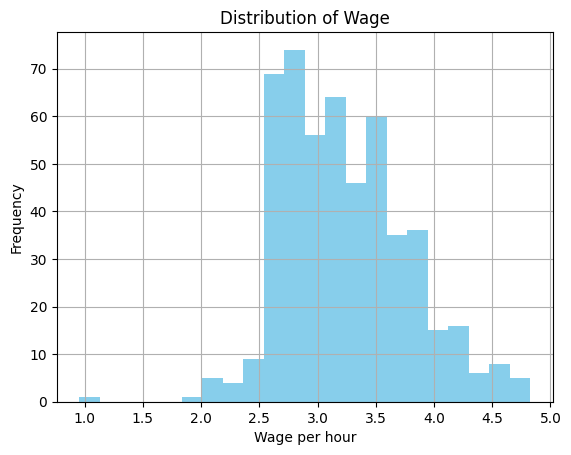

In [ ]:
# histogram - distribution of log_wage

df['log_wage'].hist(bins=22, color='skyblue')
plt.title('Distribution of Wage')
plt.xlabel('Wage per hour')
plt.ylabel('Frequency')
plt.show()

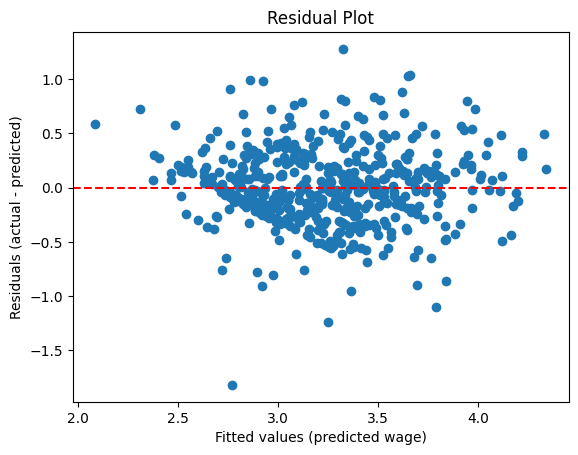

In [ ]:
# residuals plot for model 3

residuals = model3.resid
fitted_vals = model3.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot')

plt.show()

In [ ]:
# model 5 (model 3 plus educ:female + I(educ**2):female )  - all are stat significant

model5 = smf.ols('log_wage ~ educ + exper + I(exper**2)+  tenure + female + educ:female + I(educ**2):female + smsa + west + trade + services + profocc', data=df).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     52.30
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.42e-80
Time:                        12:39:28   Log-Likelihood:                -191.41
No. Observations:                 510   AIC:                             408.8
Df Residuals:                     497   BIC:                             463.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.2849    

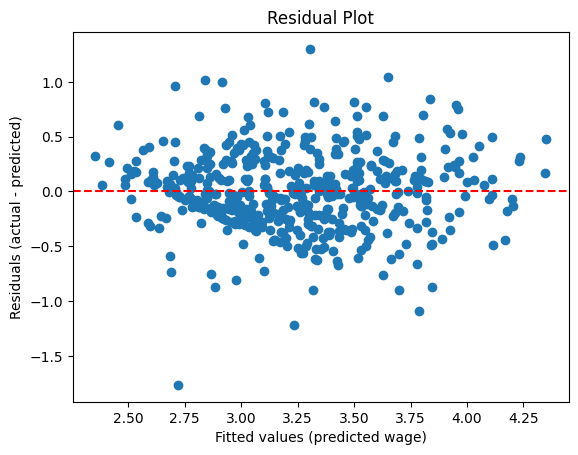

In [ ]:
# residuals plot for model 5

residuals = model5.resid
fitted_vals = model5.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot')

plt.show()

In [ ]:
# model 6 - added servocc

model6 = smf.ols('log_wage ~  exper + I(exper**2)+  female + educ + educ:female + I(educ**2):female + tenure + smsa + west + trade + services + profocc + servocc', data=df).fit()

print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     48.96
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.86e-80
Time:                        12:39:28   Log-Likelihood:                -189.13
No. Observations:                 510   AIC:                             406.3
Df Residuals:                     496   BIC:                             465.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.3141    

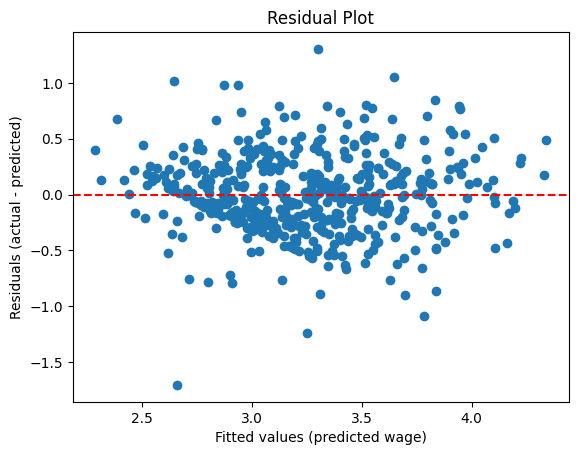

In [ ]:
# residuals plot for model 6

residuals = model6.resid
fitted_vals = model6.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot')

plt.show()

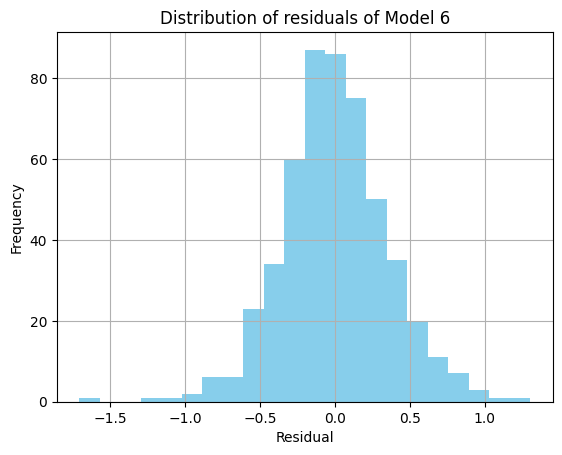

In [ ]:
# distribution of residuals for model 6

df['residuals_model_6'] = model6.resid

df['residuals_model_6'].hist(bins=22, color='skyblue')
plt.title('Distribution of residuals of Model 6')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

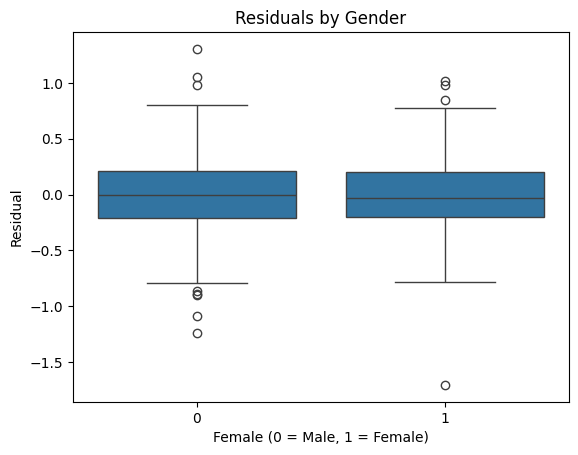

In [ ]:
# residuals by gender
sns.boxplot(x='female', y='residuals_model_6', data=df)
plt.title('Residuals by Gender')
plt.xlabel('Female (0 = Male, 1 = Female)')
plt.ylabel('Residual')
plt.show()

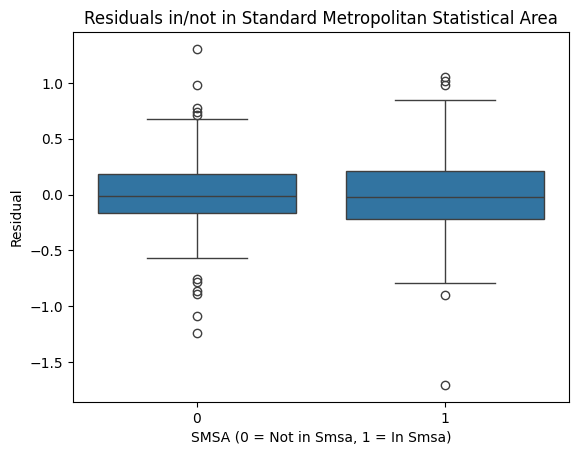

In [ ]:
# residuals by smsa
sns.boxplot(x='smsa', y='residuals_model_6', data=df)
plt.title('Residuals in/not in Standard Metropolitan Statistical Area')
plt.xlabel('SMSA (0 = Not in Smsa, 1 = In Smsa)')
plt.ylabel('Residual')
plt.show()

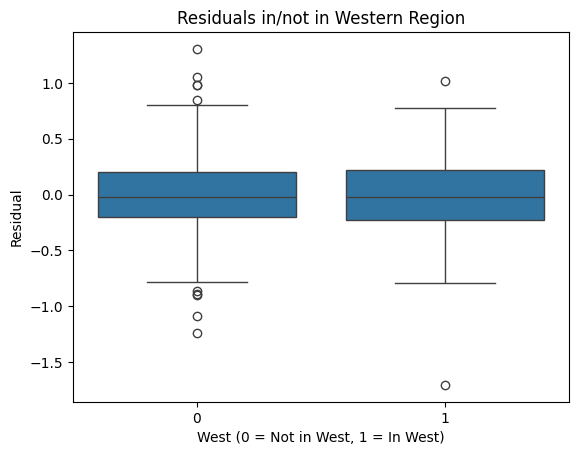

In [ ]:
# residuals by west
sns.boxplot(x='west', y='residuals_model_6', data=df)
plt.title('Residuals in/not in Western Region')
plt.xlabel('West (0 = Not in West, 1 = In West)')
plt.ylabel('Residual')
plt.show()

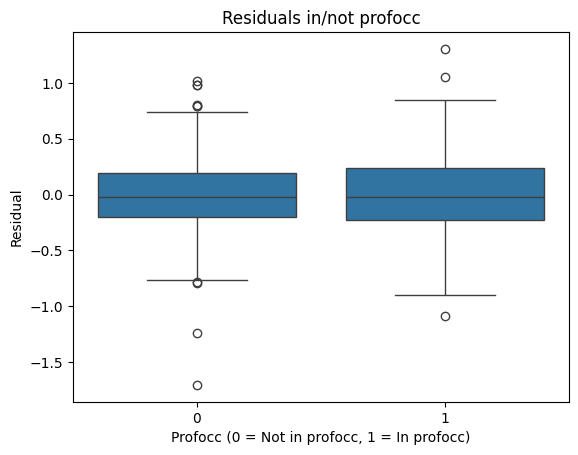

In [ ]:
# Boxplot of residuals by profocc
sns.boxplot(x='profocc', y='residuals_model_6', data=df)
plt.title('Residuals in/not profocc')
plt.xlabel('Profocc (0 = Not in profocc, 1 = In profocc)')
plt.ylabel('Residual')
plt.show()

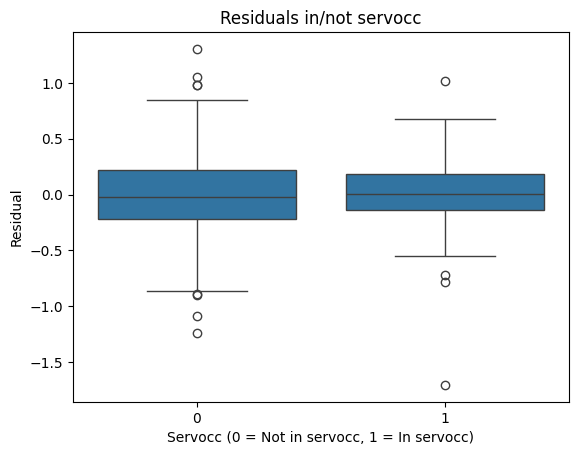

In [ ]:
# Boxplot of residuals by servocc
sns.boxplot(x='servocc', y='residuals_model_6', data=df)
plt.title('Residuals in/not servocc')
plt.xlabel('Servocc (0 = Not in servocc, 1 = In servocc)')
plt.ylabel('Residual')
plt.show()

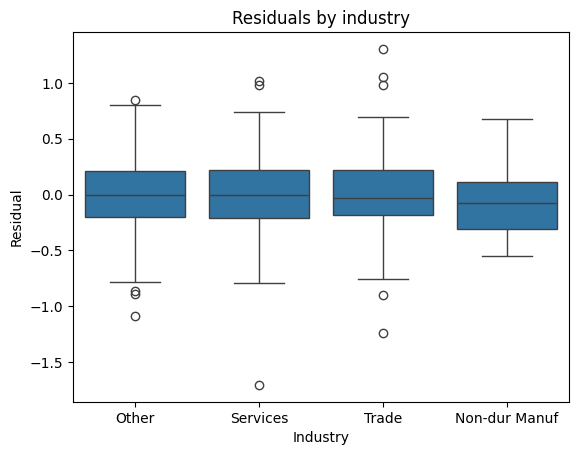

In [ ]:
# Boxplot of residuals by industry
sns.boxplot(x='industry', y='residuals_model_6', data=df)
plt.title('Residuals by industry')
plt.xlabel('Industry')
plt.ylabel('Residual')
plt.show()

In [ ]:
df['industry'].value_counts()

,count
industry,
Other,252
Trade,148
Non-dur Manuf,59
Services,51


In [ ]:
# model 6_1 - added exper:female & I(exper ** 2):female

model6_1 = smf.ols('log_wage ~  exper + I(exper**2)+ exper:female + I(exper**2):female + female + educ + educ:female + I(educ**2):female + tenure + smsa + west + trade + services + profocc + servocc', data=df).fit()

print(model6_1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     43.41
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           3.57e-80
Time:                        12:39:29   Log-Likelihood:                -185.26
No. Observations:                 510   AIC:                             402.5
Df Residuals:                     494   BIC:                             470.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.1883 

In [ ]:
df_male = df[df['female'] == 0]

model_male = smf.ols(
    'log_wage ~ educ + I(educ**2) + exper + I(exper**2) + tenure + smsa + west + trade + services + profocc + servocc',
    data=df_male
).fit()

print(model_male.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     26.77
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           1.50e-36
Time:                        12:39:29   Log-Likelihood:                -107.28
No. Observations:                 265   AIC:                             238.6
Df Residuals:                     253   BIC:                             281.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.3352      0.278      8.398

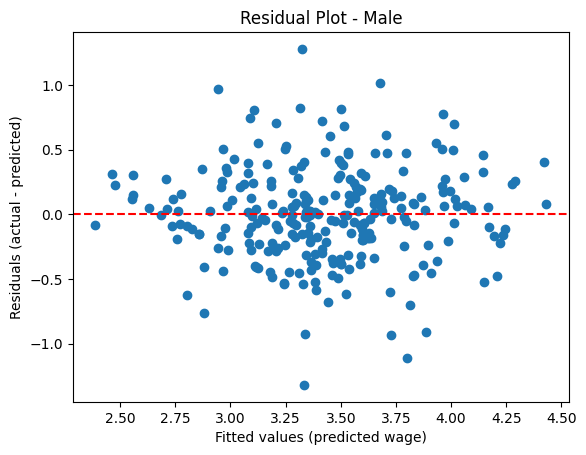

In [ ]:
# residuals plot for model_male

residuals = model_male.resid
fitted_vals = model_male.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot - Male')

plt.show()

In [ ]:
df_female = df[df['female'] == 1]

model_female = smf.ols(
    'log_wage ~ educ + I(educ**2) + exper + I(exper**2) + tenure + smsa + west + trade + services + profocc + servocc',
    data=df_female
).fit()

print(model_female.summary())


                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     16.88
Date:                Mon, 14 Jul 2025   Prob (F-statistic):           2.52e-24
Time:                        12:39:29   Log-Likelihood:                -74.661
No. Observations:                 245   AIC:                             173.3
Df Residuals:                     233   BIC:                             215.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.9354      0.219     13.384

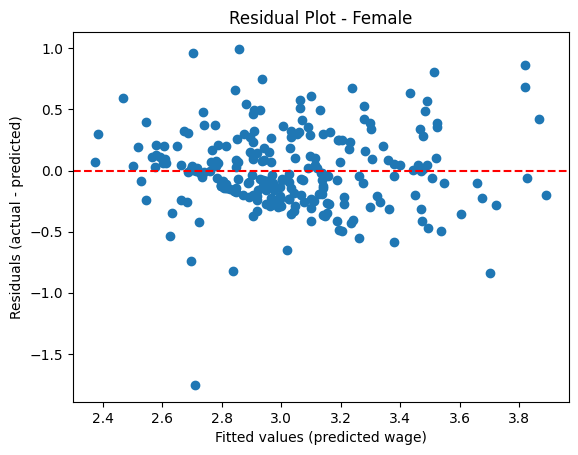

In [ ]:
# residuals plot for model_female

residuals = model_female.resid
fitted_vals = model_female.fittedvalues

plt.scatter(fitted_vals, residuals)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel('Fitted values (predicted wage)')
plt.ylabel('Residuals (actual - predicted)')
plt.title('Residual Plot - Female')

plt.show()

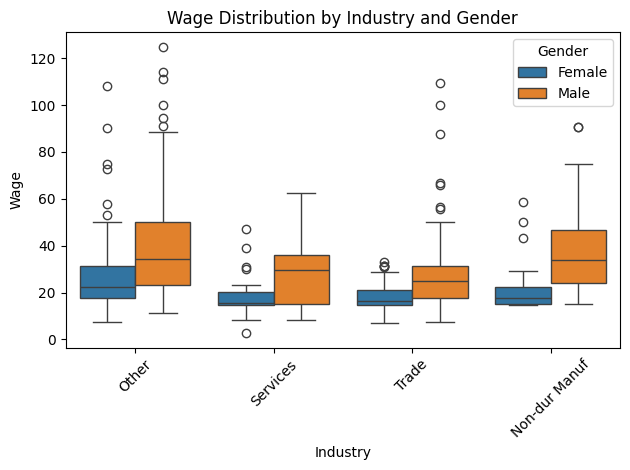

In [ ]:
#check wage distrib by industry & gender

sns.boxplot(data=df, x="industry", y="wage", hue="gender")

plt.title("Wage Distribution by Industry and Gender")
plt.xlabel("Industry")
plt.ylabel("Wage")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [ ]:
# check distrib between occupation & industry split by gender

# For Male
male_table = pd.crosstab(df[df["gender"] == "Male"]["occupation"],
                         df[df["gender"] == "Male"]["industry"])

# For Female
female_table = pd.crosstab(df[df["gender"] == "Female"]["occupation"],
                           df[df["gender"] == "Female"]["industry"])

print("Male:\n", male_table)
print("\nFemale:\n", female_table)

Male:
 industry    Non-dur Manuf  Other  Services  Trade
occupation                                       
Other                  20     59         8     37
Profocc                18     57         8     35
Servocc                 1      8         3     11

Female:
 industry    Non-dur Manuf  Other  Services  Trade
occupation                                       
Other                  16     69        17     26
Profocc                 4     37         2     27
Servocc                 0     22        13     12


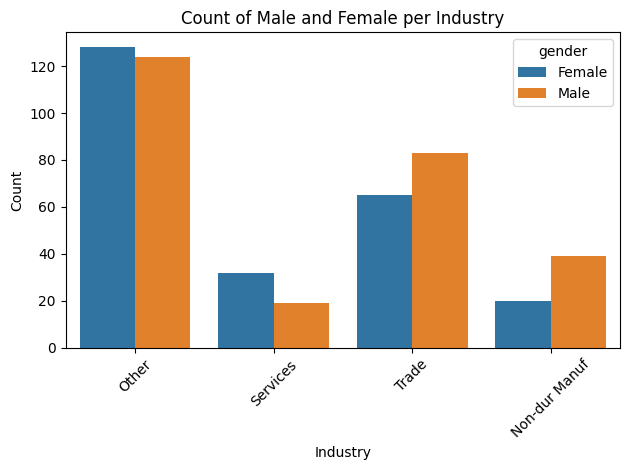

In [ ]:
sns.countplot(data=df, x="industry", hue="gender")

plt.title("Count of Male and Female per Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

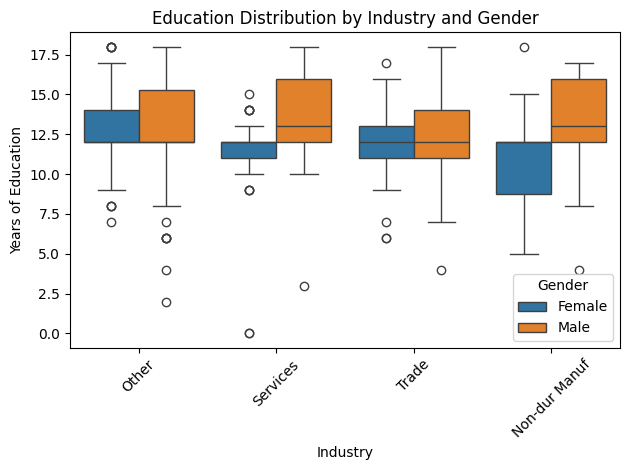

In [ ]:
sns.boxplot(data=df, x="industry", y="educ", hue="gender")

plt.title("Education Distribution by Industry and Gender")
plt.xlabel("Industry")
plt.ylabel("Years of Education")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

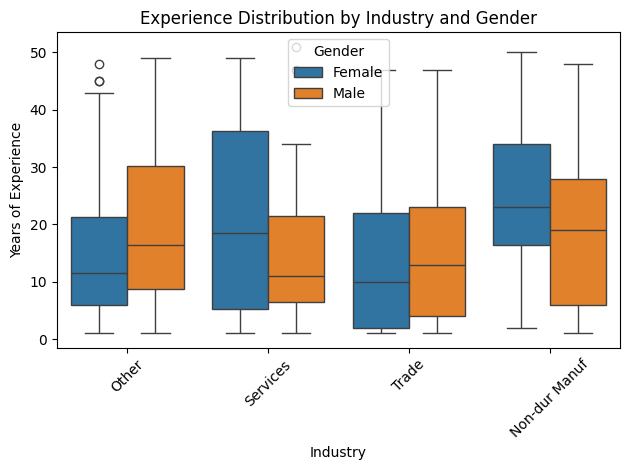

In [ ]:
sns.boxplot(data=df, x="industry", y="exper", hue="gender")

plt.title("Experience Distribution by Industry and Gender")
plt.xlabel("Industry")
plt.ylabel("Years of Experience")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()